### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

__Brief Report__

Diving into the data ocean, I've surfed through every wave—from cleaning to categorizing (so many buckets!), and shaping our dataset into something pristine. It's like detective work, but for numbers! 

Our data sleuthing uncovered a penchant for coupons among our subjects, with coffee house offers leading the pack—hardly a shocker for a Seattle crowd. (Coffee in Seattle, groundbreaking, right?) As for the temperature data, it was as telling as a cold cup of joe, so out it went. Instead, we found folks with no urgent destinations were more likely to snatch up a coupon. 
On to the bar scene—fewer takers here, but regulars were game, especially if they weren't toting kids or mourning lost love. Our data story thickened when we parsed out social butterflies from solitary sippers, discerning that being solo, under 30, or strapped for cash influenced bar coupon popularity. 

Then, the plot twist: carry-away coupons were the dark horse, stealing the spotlight in acceptance rates. A closer peek at this group revealed a gender tilt—more women than men were saying "yes" to the extra fries. 
The age-old question of age brought us to a median of 31. The post-31 crowd wasn't too keen on carry-away, so we dug deeper, factoring in jobs, income, and solo drives. Picture this: a lone guy, not too flush with cash, in a job, with coupons buzzing, is your prime "yes-man" for carry-away deals. 

As we wrap up this year's data adventure, we're toasting to the insights gleaned and the stories they've spun. Here's to a festive season and a bright New Year. We've only scratched the surface—there's more data out there waiting to tell its tale. Happy Holidays and see you all in the next chapter of our analytics saga!


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [216]:
data = pd.read_csv('data/coupons.csv')

In [217]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [218]:
#len(data)
#data["CarryAway"].value_counts()
#data["maritalStatus"].value_counts()
#percentage_accepted_by_destination = (data[data["Y"] == 1]["destination"].value_counts() / len(data)) * 100
#data["car"].value_counts()
#data["age"].value_counts()

#Bucket Age
age_mapping = {'below21': 20, '50plus': 50}
data.replace({"age": age_mapping}, inplace=True)
data["age"] = pd.to_numeric(data["age"], errors="coerce")
bins = [-float('inf'), 21, 26, 31, 36, 41, 46, 51, float('inf')]
labels = ['Below 21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '50 Plus']
data["age_group"] = pd.cut(data["age"], bins=bins, labels=labels)

#Change all column names to lowercase for consistency and to make it easier when writing code. 
data.columns = data.columns.str.lower()

#Convert the "time" column to a time format. 
data["time"] = pd.to_datetime(data["time"], format= "%I%p", errors="coerce").dt.time


#Please note, null values can be interpreted in various ways depending on the context. They might be 
#converted to 0 or assigned a different meaning. In instances where null values simply represent missing information 
#without any specific implications, excluding them from our analysis should not introduce a bias into the results 
#derived from the available data. For the purpose of maintaining simplicity in my current analysis, I 
#have opted to disregard null entries.

3. Decide what to do about your missing data -- drop, replace, other...

In [219]:
#Rename "passanger" column to "passenger"
data.rename(columns={"passanger": "passenger"}, inplace=True)

#Drop car column, because it does not have relevant values, and is sparsely populated.
data = data.drop("car", axis=1)

4. What proportion of the total observations chose to accept the coupon? 



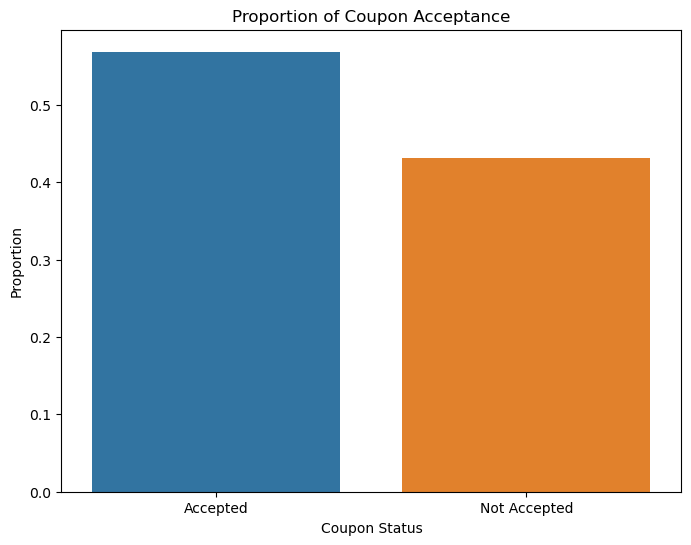

In [220]:
#Calculate the proportion of observations that chose to accept the coupon
proportion_accepted = data["y"].mean()

# Prepare data for plotting
proportions = [proportion_accepted, 1 - proportion_accepted]
labels = ["Accepted", "Not Accepted"]

#Create a Seaborn bar chart to visualize the proportions. 
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=proportions)
plt.title("Proportion of Coupon Acceptance")
plt.ylabel("Proportion")
plt.xlabel("Coupon Status")
plt.show()



5. Use a bar plot to visualize the `coupon` column.

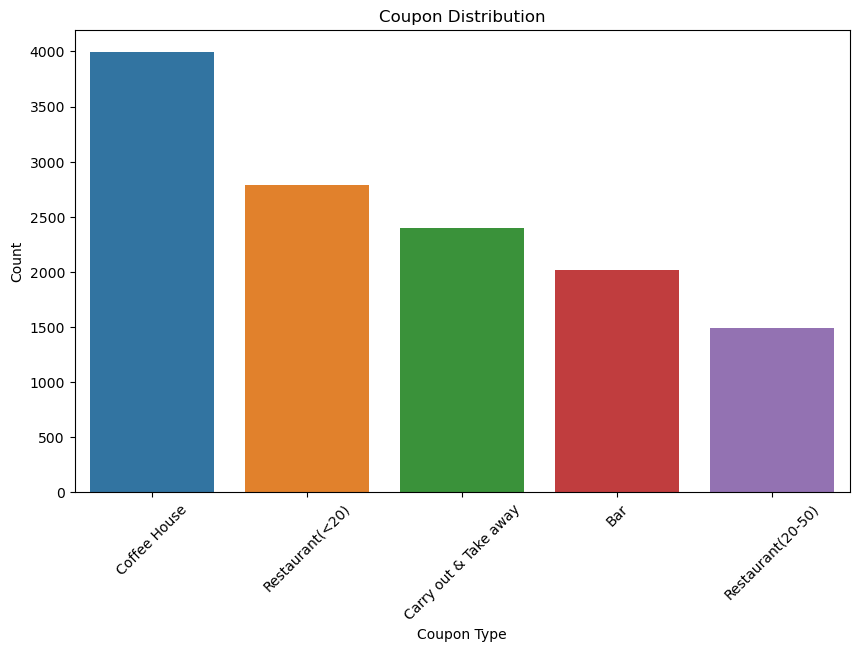

In [223]:
#Seaborn bar plot for the 'coupon' column
plt.figure(figsize=(10, 6))
sns.barplot(x=data["coupon"].value_counts().index, y=data["coupon"].value_counts().values)
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.title("Coupon Distribution")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


6. Use a histogram to visualize the temperature column.

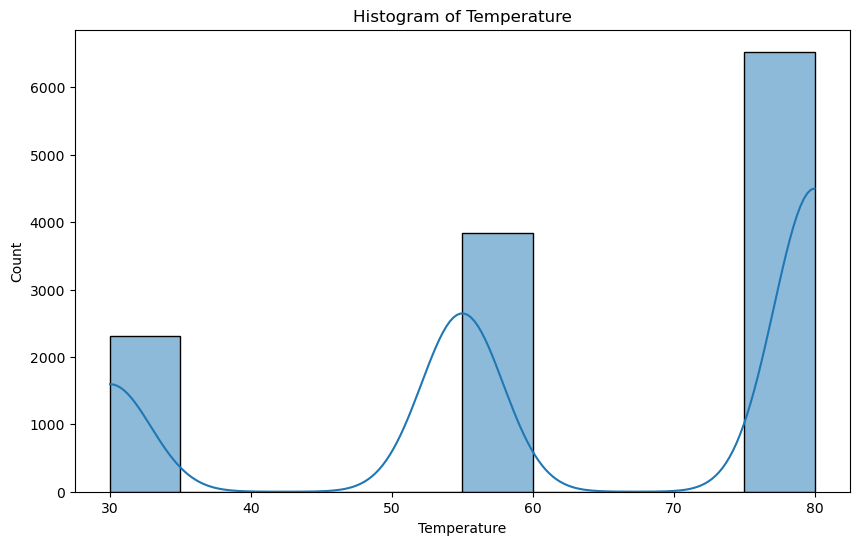

In [224]:
#Seaborn histogram for the 'temperature' column
plt.figure(figsize=(10, 6))
sns.histplot(data["temperature"], bins=10, kde=True)
plt.title("Histogram of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

#After looking at this, I would drop this column. Doesn't really tell me much about the data. Data looks skewed. 
data = data.drop("temperature", axis=1)

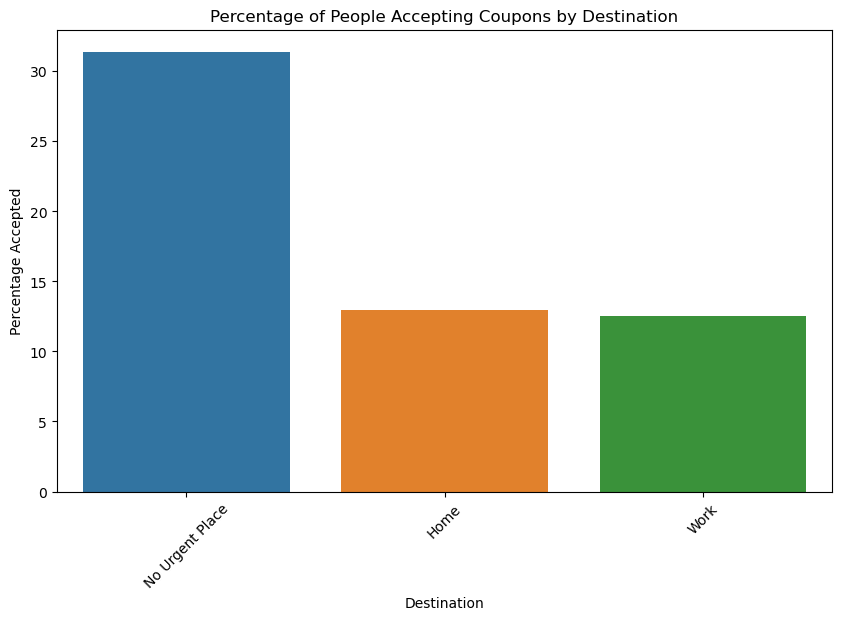

In [115]:
# First, calculate the percentages
percentage_accepted_by_destination = (data[data["y"] == 1]["destination"].value_counts() / len(data)) * 100

# Now, plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_accepted_by_destination.index, y=percentage_accepted_by_destination.values)
plt.title('Percentage of People Accepting Coupons by Destination')
plt.xlabel('Destination')
plt.ylabel('Percentage Accepted')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.show()


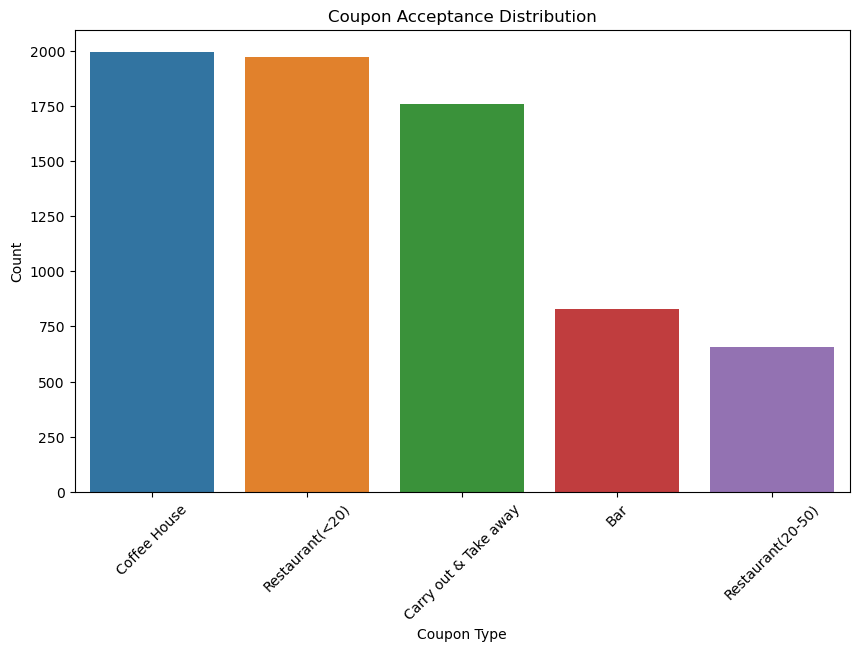

In [226]:
#Filter the DataFrame for rows where the coupon was accepted
accepted_coupons = data[data["y"] == 1]

# Now apply value_counts() to the 'coupon' column of this filtered DataFrame
accepted_coupon_counts = accepted_coupons['coupon'].value_counts()

#Seaborn bar plot for the 'coupon' column
plt.figure(figsize=(10, 6))
sns.barplot(x=accepted_coupon_counts.index, y=accepted_coupon_counts.values)
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.title("Coupon Acceptance Distribution")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [116]:
bar_coupons_df = data[data["coupon"].str.contains("Bar")]
bar_coupons_df.head()

,destination,passenger,weather,time,coupon,expiration,gender,age,maritalstatus,has_children,...,carryaway,restaurantlessthan20,restaurant20to50,tocoupon_geq5min,tocoupon_geq15min,tocoupon_geq25min,direction_same,direction_opp,y,age_group
9,No Urgent Place,Kid(s),Sunny,10:00:00,Bar,1d,Female,21,Unmarried partner,1,...,NaN,4~8,1~3,1,1,0,0,1,0,Below 21
13,Home,Alone,Sunny,18:00:00,Bar,1d,Female,21,Unmarried partner,1,...,NaN,4~8,1~3,1,0,0,1,0,1,Below 21
17,Work,Alone,Sunny,07:00:00,Bar,1d,Female,21,Unmarried partner,1,...,NaN,4~8,1~3,1,1,1,0,1,0,Below 21
24,No Urgent Place,Friend(s),Sunny,10:00:00,Bar,1d,Male,21,Single,0,...,4~8,4~8,less1,1,0,0,0,1,1,Below 21
35,Home,Alone,Sunny,18:00:00,Bar,1d,Male,21,Single,0,...,4~8,4~8,less1,1,0,0,1,0,1,Below 21


2. What proportion of bar coupons were accepted?


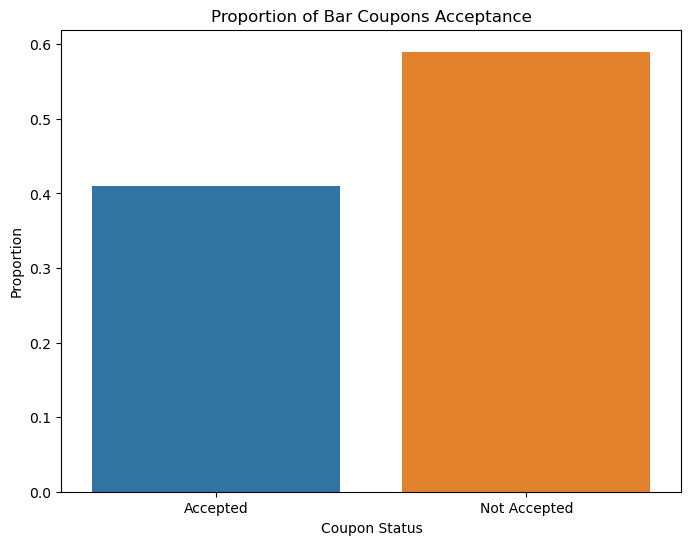

In [117]:
#Calculate the proportion of observations that chose to accept the coupon
proportion_accepted = bar_coupons_df["y"].mean()

# Prepare data for plotting
proportions = [proportion_accepted, 1 - proportion_accepted]
labels = ["Accepted", "Not Accepted"]

#Create a Seaborn bar chart to visualize the proportions. 
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=proportions)
plt.title("Proportion of Bar Coupons Acceptance")
plt.ylabel("Proportion")
plt.xlabel("Coupon Status")
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


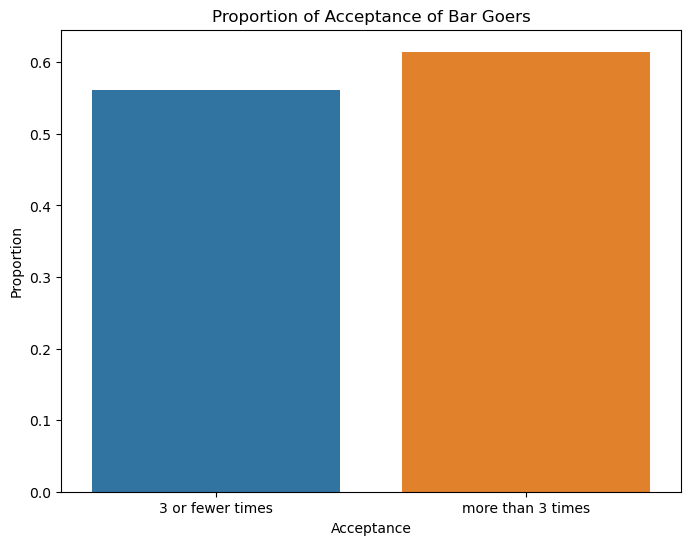

In [229]:
#Replace the "bar" column with numerical categories
bar_mapping = {
    'never': 0,   #Assuming 'never' means 0 times
    'less1': 0,   #Assuming "less1" means 0 time
    '1~3': 2,     #Taking an average value for the range
    '4~8': 6,     #Taking an average value for the range
    'gt8': 9      #Assuming 'gt8' means more than 8 times
}

#Apply the mapping to the 'Bar' column
data["bar_numeric"] = data["bar"].replace(bar_mapping)

#Create a new column 'bar_visit_group' based on the numeric representation
data["bar_visit_group"] = data["bar_numeric"].apply(lambda x: "3 or fewer times" if x <= 3 else "more than 3 times")

#Calculate the acceptance rate for each group
acceptance_rate = data.groupby("bar_visit_group")["y"].mean()

#Create a Seaborn bar chart to visualize the proportions. 
plt.figure(figsize=(8, 6))
sns.barplot(x=acceptance_rate.index, y=acceptance_rate.values)
plt.title("Proportion of Acceptance of Bar Goers")
plt.ylabel("Proportion")
plt.xlabel("Acceptance")
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


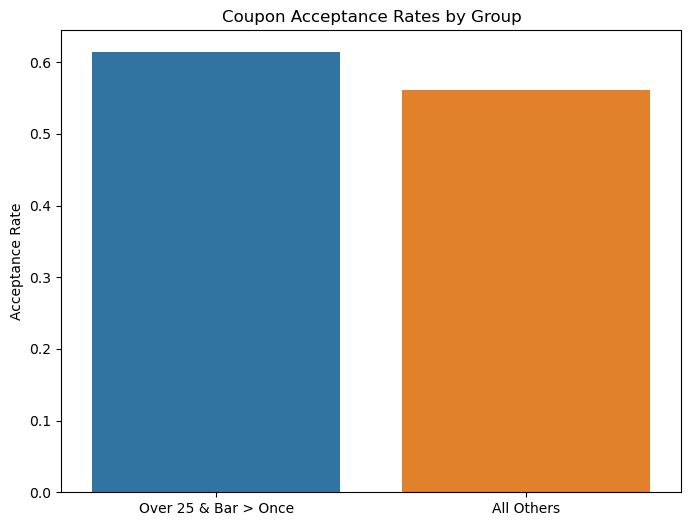

In [123]:
#Identify drivers who go to the bar more than once a month and are over the age of 25
data["over_25_and_bar_more_than_once"] = (data["bar_numeric"] > 1) & (data["age_group"].isin(["26-30", "31-35", "36-40", "41-45", "46-50", "50 Plus"]))

#Calculate the acceptance rate for the target group
target_group_acceptance_rate = data[data["over_25_and_bar_more_than_once"]]["y"].mean()

#Calculate the acceptance rate for all others using tilde symbol ~, which when used with DataFrames is a NOT operator
other_group_acceptance_rate = data[~data["over_25_and_bar_more_than_once"]]["y"].mean()

#Compare the acceptance rates
difference_in_acceptance_rates = target_group_acceptance_rate - other_group_acceptance_rate

#Now we can visualize this difference
acceptance_rates = [target_group_acceptance_rate, other_group_acceptance_rate]
groups = ["Over 25 & Bar > Once", "All Others"]

#Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=groups, y=acceptance_rates)
plt.title("Coupon Acceptance Rates by Group")
plt.ylabel("Acceptance Rate")
plt.show()


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


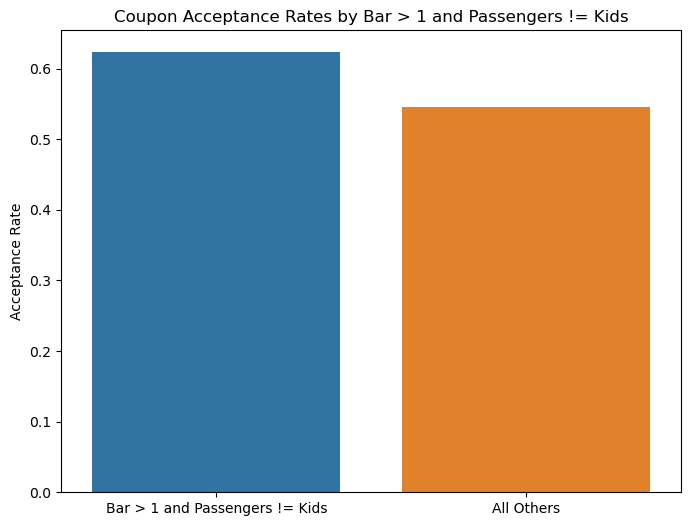

In [230]:
#Exclude kids and the specified occupation from the DataFrame. 
#Keep in mind we learned that contains treats items in the first parameter as regular expressions, so you need to switch that off and make it a literal string.
target_group_condition = (
    (data["bar_numeric"] > 1) & 
    (~data["passenger"].str.contains("Kid(s)", na=False, regex=False)) & 
    (data["occupation"] != "Farming Fishing & Forestry")
)

#Calculate the acceptance rate for the target group
target_group_acceptance_rate = data[target_group_condition]["y"].mean()

#Calculate the acceptance rate for all others
other_group_acceptance_rate = data[~target_group_condition]["y"].mean()

#Now we can visualize the difference in acceptance rates
acceptance_rates = [target_group_acceptance_rate, other_group_acceptance_rate]
groups = ["Bar > 1 and Passengers != Kids", "All Others"]

#Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=groups, y=acceptance_rates)
plt.title("Coupon Acceptance Rates by Bar > 1 and Passengers != Kids")
plt.ylabel("Acceptance Rate")
plt.show()



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



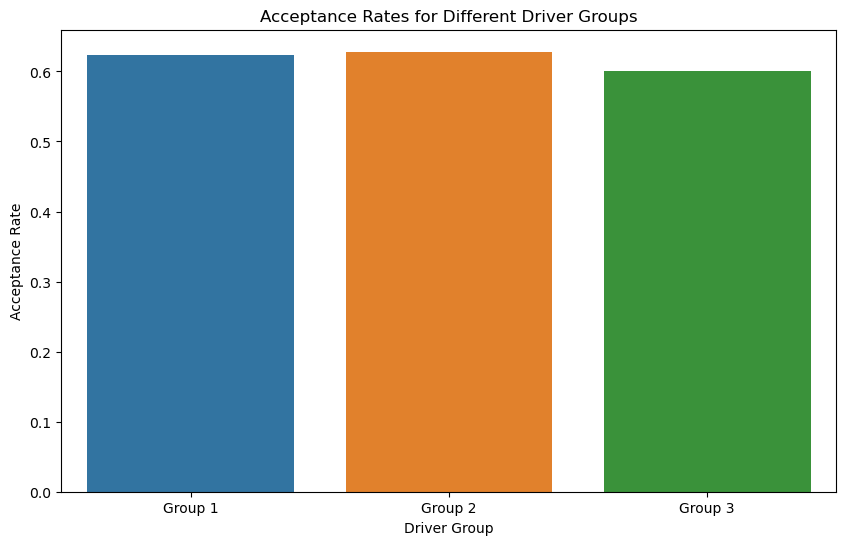

In [243]:
#Assuming a similar mapping would be applied as was done for 'bar'
data["restaurantlessthan20_numeric"] = data["restaurantlessthan20"].replace({'never': 0, 'less1': 0, '1~3': 2, '4~8': 6, 'gt8': 9})

# Mapping the 'income' to numeric values
income_mapping = {
    'Less than $12500': 6250,  #Assuming the midpoint of 0 to $12500
    '$12500 - $24999': 18750,  #Midpoint of $12500 to $24999
    '$25000 - $37499': 31250,  #Midpoint of $25000 to $37499
    '$37500 - $49999': 43750,  #Midpoint of $37500 to $49999
    '$50000 - $62499': 56250,  #Midpoint of $50000 to $62499
    '$62500 - $74999': 68750,  #Midpoint of $62500 to $74999
    '$75000 - $87499': 81250,  #Midpoint of $75000 to $87499
    '$87500 - $99999': 93750,  #Midpoint of $87500 to $99999
    '$100000 or More': 100000  #Choosing the lower bound for simplicity
}

# Apply the mapping to the 'income' column
data["income_numeric"] = data["income"].replace(income_mapping)


# Group 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed
group1_condition = (
    (data["bar_numeric"] > 1) & 
    (~data["passenger"].str.contains("Kid(s)", na=False, regex=False)) & 
    (data["maritalstatus"] != "Widowed")
)

# Group 2: go to bars more than once a month and are under the age of 30
group2_condition = (
    (data["bar_numeric"] > 1) & 
    (data["age"] < 30)
)

# Group 3: go to cheap restaurants more than 4 times a month and income is less than 50K
group3_condition = (
    (data["restaurantlessthan20_numeric"] > 4) & 
    (data["income_numeric"] < 50000)
)

# Calculate the acceptance rates for each group
group1_acceptance_rate = data[group1_condition]["y"].mean()
group2_acceptance_rate = data[group2_condition]["y"].mean()
group3_acceptance_rate = data[group3_condition]["y"].mean()

#Create a DataFrame to hold the acceptance rates for visualization
acceptance_rates_df = pd.DataFrame({
    "Group": ["Group 1", "Group 2", "Group 3"],
    "Acceptance Rate": [group1_acceptance_rate, group2_acceptance_rate, group3_acceptance_rate]
})

#Plot the acceptance rates
plt.figure(figsize=(10, 6))
sns.barplot(x="Group", y="Acceptance Rate", data=acceptance_rates_df)
plt.title("Acceptance Rates for Different Driver Groups")
plt.ylabel("Acceptance Rate")
plt.xlabel("Driver Group")
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the bar chart provided, which displays the acceptance rates for different driver groups, we can hypothesize the following about drivers who accepted the bar coupons:

- Group 1: This group has the highest acceptance rate among the three, suggesting that the drivers who fit the criteria for this group (go to bars more than once a month, have passengers that are not kids, and are not widowed) are the most likely to accept bar coupons. This could indicate that social drivers, possibly those who enjoy nightlife and social outings, find bar coupons appealing.

- Group 2: The acceptance rate for this group is lower than Group 1 but still substantial. This group consists of drivers who go to bars more than once a month and are under the age of 30. The relatively high acceptance rate might reflect a younger demographic's interest in bar-related promotions, although it's less than the rate of Group 1, which could imply that having specific types of passengers or not being widowed plays a role in coupon acceptance.

- Group 3: This group has the lowest acceptance rate among the three, which includes drivers who go to cheap restaurants more than 4 times a month and have an income of less than $50K. The lower acceptance rate for bar coupons among these drivers might suggest that their lifestyle or financial situation makes them less inclined or able to frequent bars, even with coupons, preferring instead more budget-friendly dining options.

From these observations, one might hypothesize that drivers who are more socially active and not constrained by having children as passengers, or those who are not dealing with the loss of a spouse, are more receptive to bar coupons. Age also seems to be a factor, with younger drivers being more likely to accept such coupons than those who frequent cheaper dining options and have lower incomes. This data could inform targeted marketing strategies that focus on social and economic factors influencing coupon acceptance.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

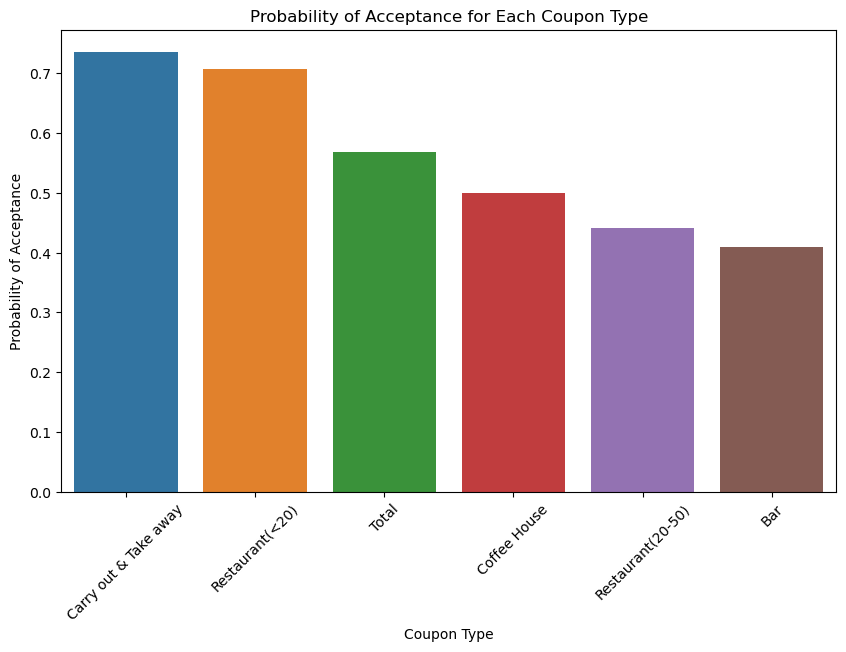

In [149]:
#Let's start with getting the probabilities for each coupon type. Going back to module one's probability lesson. 

#Let's get the probability that anyone will accept a coupon.
total_probability = data["y"].mean()

#Calculate the acceptance count for each coupon type
accepted_coupons_by_type = data.groupby("coupon")["y"].sum()

#Calculate the total count for each coupon type
total_coupons_by_type = data.groupby("coupon")["y"].count()

#Calculate the probability of acceptance for each coupon type
probability_by_coupon_type = accepted_coupons_by_type / total_coupons_by_type

#Convert total probability to a DataFrame. 
total_row = pd.DataFrame({"Coupon Type": ["Total"], "Probability of Acceptance": [total_probability]})

#Convert probability of acceptance for each coupon type to a DataFrame for plotting
probability_by_coupon_type_df = probability_by_coupon_type.reset_index()
probability_by_coupon_type_df.columns = ["Coupon Type", "Probability of Acceptance"]
probability_by_coupon_type_df = pd.concat([total_row, probability_by_coupon_type_df], ignore_index=True)
probability_by_coupon_type_df = probability_by_coupon_type_df.sort_values(by="Probability of Acceptance", ascending=False)


# Plotting the probabilities
plt.figure(figsize=(10, 6))
sns.barplot(x="Coupon Type", y="Probability of Acceptance", data=probability_by_coupon_type_df)
plt.title("Probability of Acceptance for Each Coupon Type")
plt.ylabel("Probability of Acceptance")
plt.xlabel("Coupon Type")
plt.xticks(rotation=45)
plt.show()


The bar chart presented above reveals that while Coffee House coupons are the most frequently distributed, a deeper analysis focused on the probability of acceptance might yield more actionable insights. By assessing the likelihood of coupon acceptance, we can identify which group exhibits the highest propensity to engage with the promotion, making them an ideal demographic for further study and targeted marketing efforts. Let’s proceed to delve into this group to better understand the factors influencing their coupon redemption behavior.

In [238]:
#Create a DataFrame that just has Carry out & Take away coupons. 

carry_away_coupons_df = data[data["coupon"] == "Carry out & Take away"]
carry_away_coupons_df

,destination,passenger,weather,time,coupon,expiration,gender,age,maritalstatus,has_children,...,tocoupon_geq15min,tocoupon_geq25min,direction_same,direction_opp,y,age_group,bar_numeric,bar_visit_group,carry_away_numeric,carry_away_group
2,No Urgent Place,Friend(s),Sunny,10:00:00,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,1,0,0,1,1,Below 21,0.0,3 or fewer times,NaN,more than 3 times
6,No Urgent Place,Friend(s),Sunny,14:00:00,Carry out & Take away,1d,Female,21,Unmarried partner,1,...,1,0,0,1,1,Below 21,0.0,3 or fewer times,NaN,more than 3 times
8,No Urgent Place,Kid(s),Sunny,10:00:00,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,1,0,0,1,1,Below 21,0.0,3 or fewer times,NaN,more than 3 times
19,Work,Alone,Sunny,07:00:00,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,0,0,1,0,1,Below 21,0.0,3 or fewer times,NaN,more than 3 times
25,No Urgent Place,Friend(s),Sunny,10:00:00,Carry out & Take away,2h,Male,21,Single,0,...,1,0,0,1,0,Below 21,0.0,3 or fewer times,6.0,more than 3 times
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,No Urgent Place,Friend(s),Sunny,10:00:00,Carry out & Take away,2h,Male,26,Single,0,...,0,0,0,1,1,21-25,0.0,3 or fewer times,2.0,3 or fewer times
12672,Home,Alone,Sunny,18:00:00,Carry out & Take away,2h,Male,26,Single,0,...,1,0,1,0,0,21-25,0.0,3 or fewer times,2.0,3 or fewer times
12673,Home,Alone,Sunny,18:00:00,Carry out & Take away,1d,Male,26,Single,0,...,0,0,0,1,0,21-25,0.0,3 or fewer times,2.0,3 or fewer times
12679,Home,Partner,Rainy,18:00:00,Carry out & Take away,1d,Male,26,Single,0,...,0,0,1,0,1,21-25,0.0,3 or fewer times,2.0,3 or fewer times


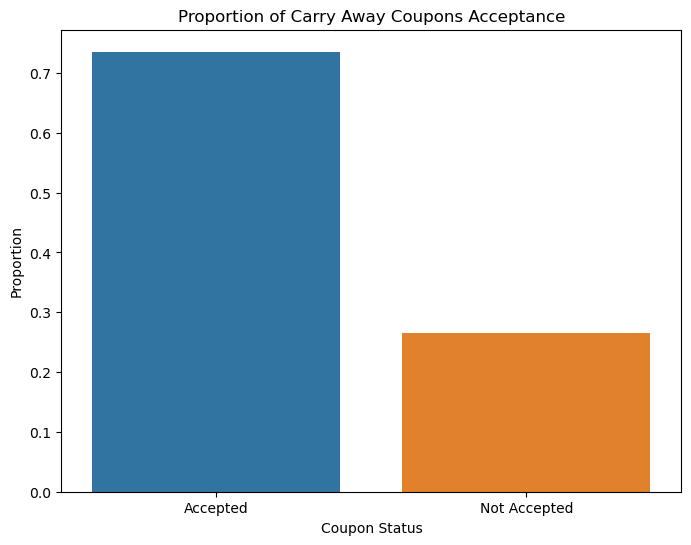

In [236]:
#Calculate the proportion of observations that chose to accept the Carry Out coupon
proportion_accepted = carry_away_coupons_df["y"].mean()

# Prepare data for plotting
proportions = [proportion_accepted, 1 - proportion_accepted]
labels = ["Accepted", "Not Accepted"]

#Create a Seaborn bar chart to visualize the proportions. 
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=proportions)
plt.title("Proportion of Carry Away Coupons Acceptance")
plt.ylabel("Proportion")
plt.xlabel("Coupon Status")
plt.show()

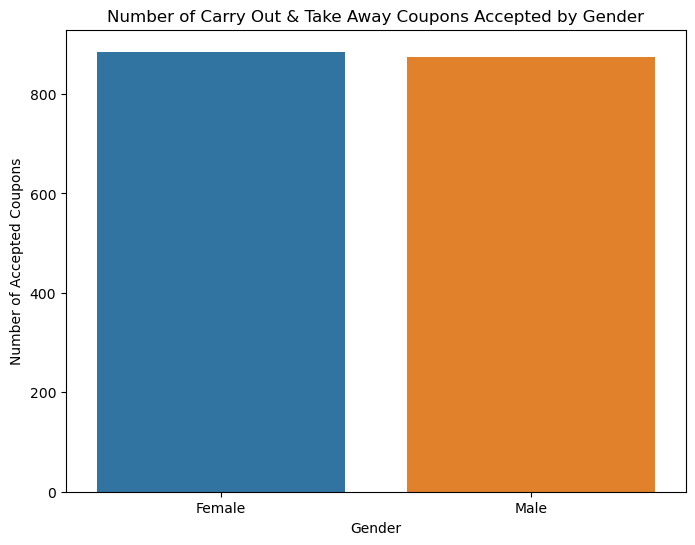

In [237]:
#Filter the DataFrame to include only accepted 'Carry out & Take away' coupons
accepted_carry_away = data[(data["coupon"] == "Carry out & Take away") & (data["y"] == 1)]

#Calculate the count of accepted coupons by gender
gender_counts = accepted_carry_away["gender"].value_counts()

#Now, plot the count of accepted coupons by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Number of Accepted Coupons')
plt.title('Number of Carry Out & Take Away Coupons Accepted by Gender')
plt.show()



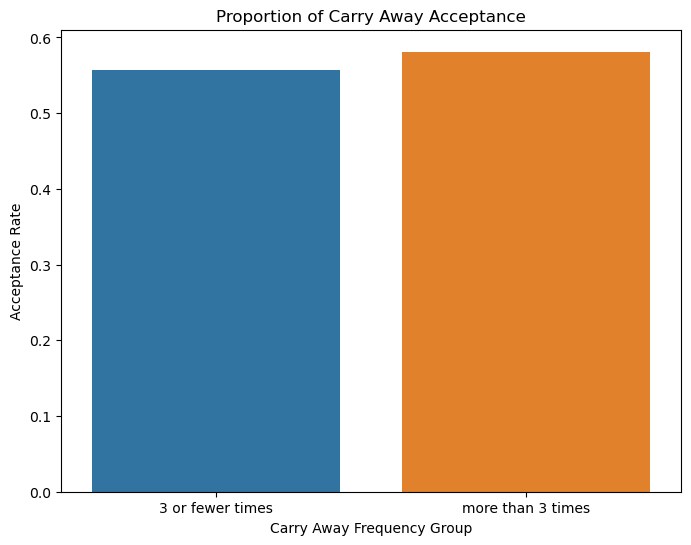

In [235]:
#Compare the acceptance rate between those who went carried away 3 or fewer times a month to those who went more.
#Replace the "carryaway" column with numerical categories
carry_away_mapping = {
    'never': 0,   #Assuming 'never' means 0 times
    'less1': 0,   #Assuming "less1" means 0 time
    '1~3': 2,     #Taking an average value for the range
    '4~8': 6,     #Taking an average value for the range
    'gt8': 9      #Assuming 'gt8' means more than 8 times
}

#Apply the mapping to the "carryaway" column
data["carry_away_numeric"] = data["carryaway"].replace(carry_out_mapping)

#Create a new carry_away_group column based on the numeric representation
data["carry_away_group"] = data["carry_away_numeric"].apply(lambda x: "3 or fewer times" if x <= 3 else "more than 3 times")

#Calculate the acceptance rate for each group
acceptance_rate = data.groupby("carry_away_group")["y"].mean()

#Create a Seaborn bar chart to visualize the proportions. 
plt.figure(figsize=(8, 6))
sns.barplot(x=acceptance_rate.index, y=acceptance_rate.values)
plt.title("Proportion of Carry Away Acceptance")
plt.ylabel("Acceptance Rate")
plt.xlabel("Carry Away Frequency Group")
plt.show()


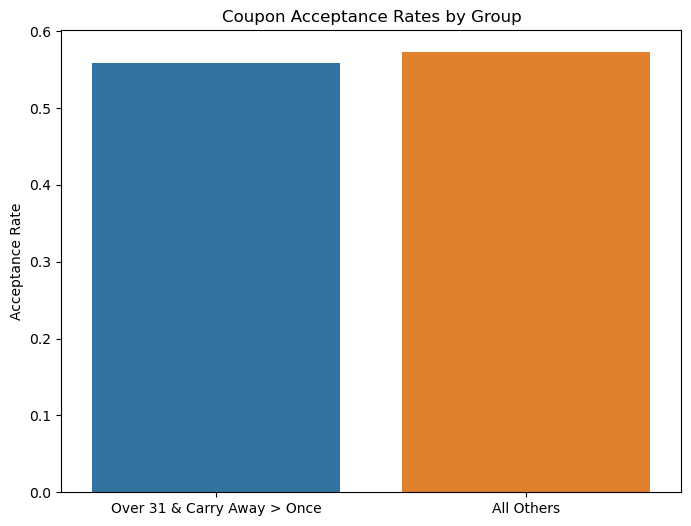

In [239]:
#Get the median age of people who carry away. 
median_age = data["age"].median()

#Identify drivers who carry away bar more than once a month and are over the age of 31
data["over_31_and_carry_away_more_than_once"] = (data["carry_away_numeric"] > 1) & (data["age_group"].isin(["31-35", "36-40", "41-45", "46-50", "50 Plus"]))

#Calculate the acceptance rate for the target group
target_group_acceptance_rate = data[data["over_31_and_carry_away_more_than_once"]]["y"].mean()

#Calculate the acceptance rate for all others using tilde symbol ~, which when used with DataFrames is a NOT operator
other_group_acceptance_rate = data[~data["over_31_and_carry_away_more_than_once"]]["y"].mean()

#Compare the acceptance rates
difference_in_acceptance_rates = target_group_acceptance_rate - other_group_acceptance_rate

#Now we can visualize this difference
acceptance_rates = [target_group_acceptance_rate, other_group_acceptance_rate]
groups = ["Over 31 & Carry Away > Once", "All Others"]

#Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=groups, y=acceptance_rates)
plt.title("Coupon Acceptance Rates by Group")
plt.ylabel("Acceptance Rate")
plt.show()

In [256]:
#Get the counts of the occupation of the people who carry away.
list_of_top_occupation = data[(data["carryaway"].notnull()) & (data["y"] == 1)]["occupation"].value_counts().index.tolist()
print(list_of_top_occupation[:9])

['Unemployed', 'Student', 'Computer & Mathematical', 'Sales & Related', 'Education&Training&Library', 'Management', 'Office & Administrative Support', 'Arts Design Entertainment Sports & Media', 'Business & Financial']


In [257]:
#Get the counts of the passenger of the people who carry away. 
data[data["carryaway"].notnull()]["passenger"].value_counts()

#Get the counts of the incomes of the people who carry away. 
data[data["carryaway"].notnull()]["income"].value_counts()

income
$25000 - $37499     2007
$12500 - $24999     1831
$37500 - $49999     1777
$100000 or More     1736
$50000 - $62499     1631
Less than $12500    1036
$62500 - $74999      840
$87500 - $99999      840
$75000 - $87499      835
Name: count, dtype: int64

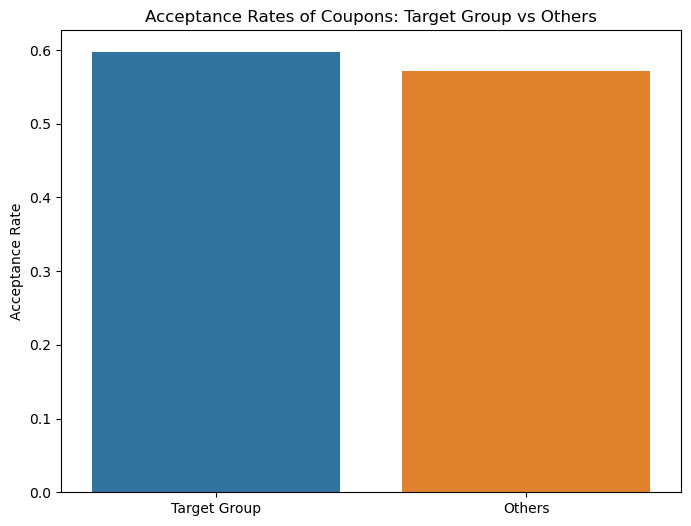

In [258]:
#Map time of day
time_to_part_of_day = {
    '07:00:00': "Morning",  
    '10:00:00': "Morning",  
    '14:00:00': "Afternoon",  
    '18:00:00': "Evening",  
    '22:00:00': "Night"  
}

#Create a new column
data["part_of_day"] = data["time"].map(time_to_part_of_day)


#Define the target occupations
target_occupations = list_of_top_occupation[:9]

#Define target conditions
target_condition = (
    (data["carry_away_numeric"] > 3) & 
    (data["passenger"] == "Alone") & 
    (data["gender"] == "Male") &
    (data["occupation"].isin(target_occupations)) &
    (data["income_numeric"] < 65000) 
#    ((data["part_of_day"] == "Evening") | (data["part_of_day"] == "Night"))
)

#Calculate the acceptance rate for this group
target_occupation_acceptance_rate = data[target_condition]["y"].mean()

#Define the non-target occupations condition
non_target_occupations_condition = (
    (data["carry_away_numeric"] > 3) & 
    (data["passenger"] == "Alone") & 
    (data["gender"] != "Male") &
    (~data["occupation"].isin(target_occupations)) &
    (data["income_numeric"] < 65000) 
#    ((data["part_of_day"] == "Evening") | (data["part_of_day"] == "Night"))
)

# Calculate the acceptance rate for non-target occupations
non_target_occupations_acceptance_rate = data[non_target_occupations_condition]["y"].mean()


# Preparing data for plotting
acceptance_rates = [target_occupation_acceptance_rate, non_target_occupations_acceptance_rate]
groups = ["Target Group", "Others"]

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=groups, y=acceptance_rates)
plt.title("Acceptance Rates of Coupons: Target Group vs Others")
plt.ylabel("Acceptance Rate")
plt.show()


time
18:00:00    3230
07:00:00    3164
10:00:00    2275
14:00:00    2009
22:00:00    2006
Name: count, dtype: int64